<a href="https://colab.research.google.com/github/srinivasanibmbangalore/Deep-Learning2/blob/Version-1/MultiClass_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

# new libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles

In [0]:
class MultiClass_FullNN:

    def __init__(self, n_inputs, n_outputs,hidden_sizes = [2]):

        np.random.seed(0)
        self.nx = n_inputs # Number of features in the dataset
        self.ny = n_outputs # Number of class labels
        self.nh = len(hidden_sizes) #Number of hidden layers

        #Build a list with number of neurons in each layer starting from input layer to output layer: e.g [8,5,4,4,3]-> 8 Neurons in i/p, 3 hidden layer with 5,4,4 neurons in hidden layer and 3 neurons in output layer
        self.sizes = [self.nx] + hidden_sizes + [self.ny]

        
        print("nx="+str(self.nx))
        print("ny="+str(self.ny))
        print("nh="+str(self.nh))
        print(self.sizes)
        self.initialize_weights_bias()
    def initialize_weights_bias(self):

        self.W={}
        self.B={}
        for i in range(self.nh+1):
            ####Note: Number of Rows->Number of nodes bottom layer and columns = number of nodes in the current hidden layers
            print(i)
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            print(self.W[i+1])

             ####Note: Number of Rows=1 and  columns = number of nodes in the current hidden layers
            self.B[i+1]= np.zeros((1,self.sizes[i+1]))
        
    def sigmoid(self, x):
         return 1.0/(1.0 + np.exp(-x))
  
    def softmax(self, x):
         exps = np.exp(x)
         return exps / np.sum(exps)
    

    def forward_pass(self, x):
      self.A = {}
      self.H = {}
      self.H[0] = x.reshape(1, -1) ## Reshaped to one row and as many column
      for i in range(self.nh):
        self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]  #Note it is not a dot product. Rather it is a matrix multiplication
        self.H[i+1] = self.sigmoid(self.A[i+1])
      self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
      self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
      return self.H[self.nh+1]
    
    def cross_entropy(self,label,pred):
        yl=np.multiply(pred,label)
        yl=yl[yl!=0]
        yl=-np.log(yl)
        yl=np.mean(yl)
        return yl
    
    def grad_sigmoid(self,x):
        return x*(1-x)
 
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1

        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
    def predict(self,X):

        Y_pred=[]
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()
    
    def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
        if display_loss:
            loss = {}
      
        if initialize:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
        for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
                  
            m = X.shape[1]
            for i in range(self.nh+1):
              self.W[i+1] -= learning_rate * (dW[i+1]/m)
              self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
            if display_loss:
                Y_pred = self.predict(X) 
                loss[epoch] = self.cross_entropy(Y, Y_pred)
                #print("loss is " + str(loss[epoch]))
        epoch_list=[]
        loss_list=[]
        for d in range(epochs):
          epoch_list.append(d)
          loss_list.append(loss[d])
            
        #print(type(loss.values()))
        if display_loss:
           plt.plot(epoch_list,loss_list)
           plt.xlabel('Epochs')
           plt.ylabel('CE')
           plt.show()


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

(1000, 2) (1000,)


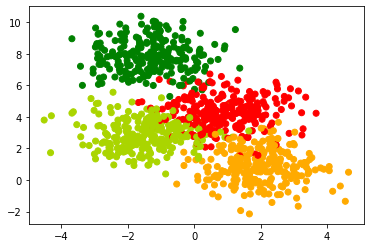

In [23]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)


plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

In [34]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


In [35]:

enc=OneHotEncoder() #from scikit library. Can do for both numerical and categorical
# 0->[1,0,0,0] 1->[0,1,0,0] 2->[0,0,1,0] 3->[0,0,0,1]
y_OH_train=enc.fit_transform(np.expand_dims(Y_train,1)).toarray()  # The number of elements is the number of unique elements in the set
y_OH_val=enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape,y_OH_val.shape)
print(y_OH_train[0])

(750, 4) (250, 4)
[1. 0. 0. 0.]


nx=2
ny=4
nh=3
[2, 7, 5, 6, 4]
0
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842]
 [-0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351  0.76103773
   0.12167502]]
1
[[ 0.44386323  0.33367433  1.49407907 -0.20515826  0.3130677 ]
 [-0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921]
 [ 1.46935877  0.15494743  0.37816252 -0.88778575 -1.98079647]
 [-0.34791215  0.15634897  1.23029068  1.20237985 -0.38732682]
 [-0.30230275 -1.04855297 -1.42001794 -1.70627019  1.9507754 ]
 [-0.50965218 -0.4380743  -1.25279536  0.77749036 -1.61389785]]
2
[[-0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218 -0.02818223]
 [ 0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117 -0.67246045]
 [-0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094 -1.63019835]
 [ 0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291  1.13940068]
 [-1.23482582  0.40234164 -0.68481009 -0.8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


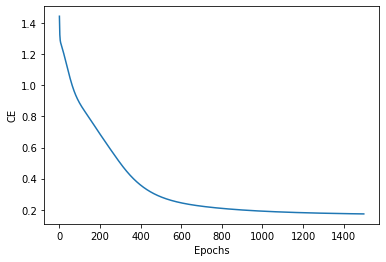

In [56]:
ffnw1 = MultiClass_FullNN(X_train.shape[1],4,[7,5,6])
ffnw1.fit(X_train, y_OH_train, epochs = 1500, learning_rate = 0.001, display_loss = True)

In [57]:

Y_pred_train = ffnw1.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train, 1)

Y_pred_val = ffnw1.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val, 1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.93
Validation accuracy 0.94


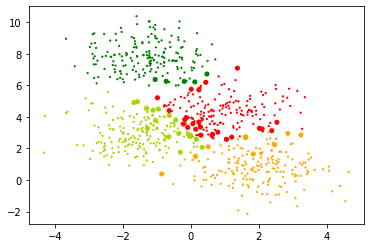

In [59]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()
## The thicker ones are the ones which are erroneously classified.
## It is noted that they are all near the border areas (intersection point of the classes)